<a href="https://colab.research.google.com/github/Anuja-F/ML-Practice-Notebook/blob/master/CNNfashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")
training=np.array(fashion_train,dtype='float32')
testing=np.array(fashion_test,dtype='float32')

0.0

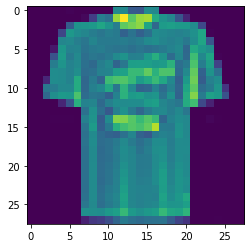

In [7]:
import random
i=random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label=training[i,0]
label

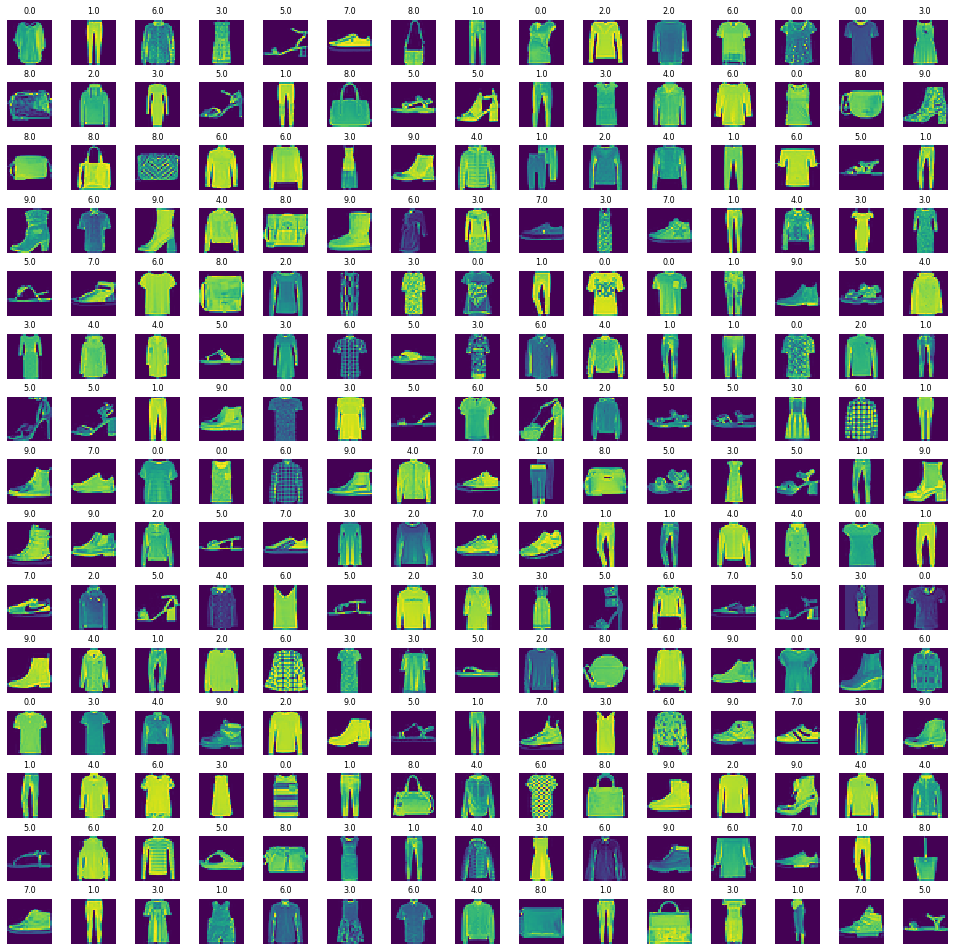

In [8]:
W_grid=15
L_grid=15
fig,axes=plt.subplots(L_grid,W_grid,figsize=(17,17))
axes=axes.ravel()
n_training = len(training)
for i in np.arange(0,W_grid*L_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0],fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)    

In [0]:
X_train = training[:,1:]/255
y_train=training[:,0]
X_test = testing[:,1:]/255
y_test=testing[:,0]
from sklearn.model_selection import train_test_split
X_train,X_validate,y_train,y_validate=train_test_split(X_train,y_train,test_size=0.2,random_state=12345)
X_train=X_train.reshape(X_train.shape[0],*(28,28,1))
X_test=X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate=X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


Using TensorFlow backend.


In [11]:
cnn_model=Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim=32,activation='relu'))
cnn_model.add(Dense(output_dim=10,activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [12]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [13]:
cnn_model.fit(X_train,y_train,batch_size=512,nb_epoch=50,verbose=1,validation_data=(X_validate,y_validate))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/50





48000/48000 [==============================] - 17s 351us/step - loss: 0.9731 - acc: 0.6055 - val_loss: 0.5067 - val_acc: 0.8218
Epoch 2/50
48000/48000 [==============================] - 16s 333us/step - loss: 0.4563 - acc: 0.8414 - val_loss: 0.4441 - val_acc: 0.8459
Epoch 3/50
48000/48000 [==============================] - 16s 335us/step - loss: 0.4035 - acc: 0.8587 - val_loss: 0.4047 - val_acc: 0.8560
Epoch 4/50
48000/48000 [==============================] - 16s 334us/step - loss: 0.3711 - acc: 0.8702 - val_loss: 0.3835 - val_acc: 0.8622
Epoch 5/50
48000/48000 [==============================] - 16s 334us/step - loss: 0.3526 - acc: 0.8761 - val_loss: 0.3374 - val_acc: 0.8838
Epoch 6/50
48000/48000 [==============================] - 16s 334us/step - loss: 0.3335 - acc: 0.8825 - val_loss: 0.3399 - val_acc: 0.8784
Epoch 7/50
480

In [14]:
evaluation =cnn_model.evaluate(X_test,y_test)
print("Test accuracy: {:.3f}".format(evaluation[1]))

10000/10000 [==============================] - 2s 165us/step
Test accuracy: 0.914


In [0]:
pred_class=cnn_model.predict(X_test)

TypeError: ignored

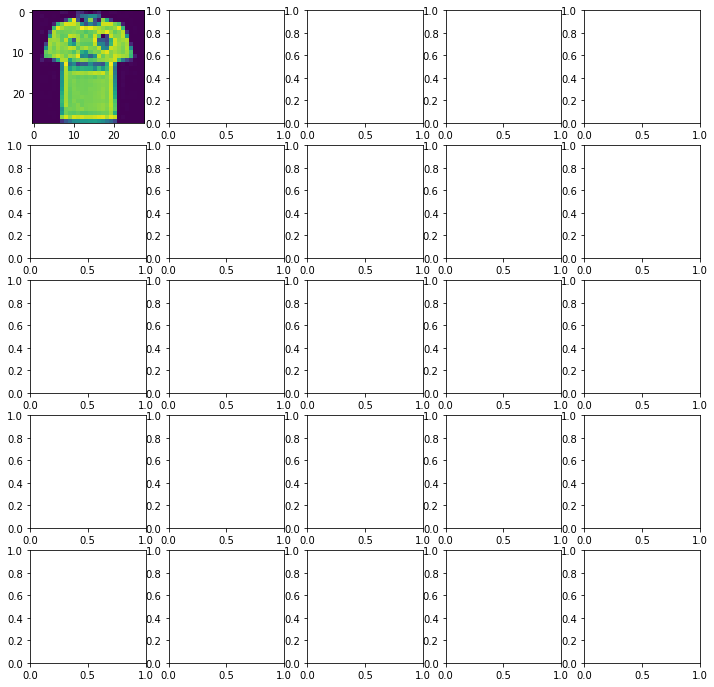

In [17]:
W_grid=5
L_grid=5
fig,axes=plt.subplots(L_grid,W_grid,figsize=(12,12))
axes=axes.ravel()
n_training = len(training)
for i in np.arange(0,W_grid*L_grid):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("prediction class ={:0.1f}\nTrue Class={:0.1f}".format(pred_class[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.5)

In [0]:
from sklearn.metrics import confusion_matrix,classification_report  
cn=confusion_matrix(y_test,predicted_classes)
plt.fig(figsize=(14,10))
sns.heatmap(cn,annot = True)
num_classes=10
target_names=["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test,pred_class,target_names=target_names))
